**First data set**

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from numpy.core.fromnumeric import size

In [2]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)


In [3]:
# Finding frequency of each category
targets, frequency = np.unique(twenty_train.target, return_counts=True)
targets, frequency 
sum(frequency)

11314

In [4]:
targets_str = np.array(twenty_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


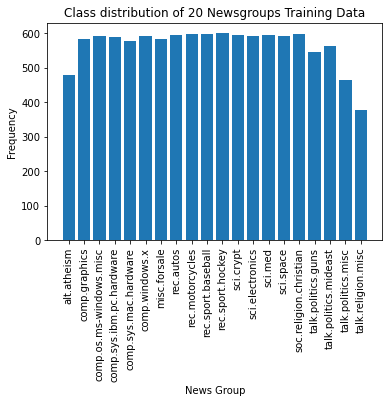

In [5]:
# Training data class distribution
fig=plt.figure( )
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

**Data cleaning:**

First we make data farame and then we start cleaning the data. 

data cleaning process: Tokenization, Convert everything to lowercase, Removing stopwords, Stemming, Lemmatizing, and converting text data to a vector representation



In [6]:
twenty_train_df = pd.DataFrame({'data': twenty_train.data, 'target': twenty_train.target})
twenty_train_df.head()

,data,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [7]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

twenty_train_df['data'] = twenty_train_df.data.map(alphanumeric).map(punc_lower)
twenty_train_df.head()

,data,target
0,from lerxst wam umd edu where s my thing \ns...,7
1,from guykuo carson u washington edu guy kuo ...,4
2,from twillis ec ecn purdue edu thomas e will...,4
3,from jgreen amber joe green \nsubject re w...,1
4,from jcm head cfa harvard edu jonathan mcdow...,14


**Test data**

load and cleaning

In [8]:
twenty_test = fetch_20newsgroups(subset='test', remove = ('headers', 'footers', 'quotes'))

In [9]:
# Finding frequency of each category
targets_test, frequency_test = np.unique(twenty_test.target, return_counts=True)
targets_test, frequency_test
sum(frequency_test)

7532

In [10]:
targets_str2 = np.array(twenty_test.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


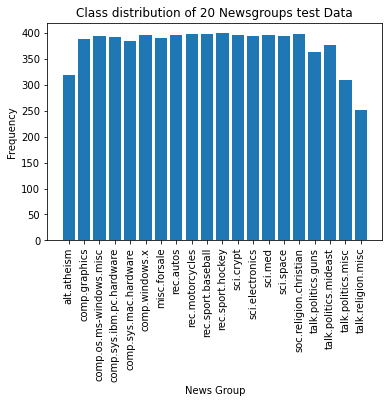

In [11]:
# Training data class distribution
fig=plt.figure( )
plt.bar(targets_str2,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Cleaning test data
twenty_test_df = pd.DataFrame({'data': twenty_test.data, 'target': twenty_test.target})
twenty_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [13]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

twenty_test_df['data'] = twenty_test_df.data.map(alphanumeric).map(punc_lower)
twenty_test_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


**Count Vectorizer**


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_cv = count_vect.fit_transform(twenty_train_df.data)  # fit_transform learns the vocab and one-hot encodes
X_test_cv = count_vect.transform(twenty_test_df.data) # transform uses the same vocab and one-hot encodes



In [15]:
print(X_train_cv.shape)


(11314, 82229)


**TF-IDF Vectorizer**


In [16]:
# Creating a document-term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer() 

X_train_tfidfV = tfidfV.fit_transform(twenty_train_df.data) # fit_transform learns the vocab and one-hot encodes 
X_test_tfidfV = tfidfV.transform(twenty_test_df.data) # transform uses the same vocab and one-hot encodes 



In [17]:
print(X_test_tfidfV.shape)
print(X_test_tfidfV)

(7532, 82229)
  (0, 81230)	0.04430979921849208
  (0, 80951)	0.09581324160674037
  (0, 79136)	0.12344710539331953
  (0, 78233)	0.05515864573510405
  (0, 75830)	0.2664653871895212
  (0, 75493)	0.12157512367314485
  (0, 71938)	0.06356743211473717
  (0, 71673)	0.14588023539200273
  (0, 71288)	0.04324134170513733
  (0, 71207)	0.055171414049543864
  (0, 71073)	0.07117960439717716
  (0, 71029)	0.24518765187536357
  (0, 71014)	0.03857182436369772
  (0, 70992)	0.06975363822473295
  (0, 70606)	0.09811695148686794
  (0, 68914)	0.15522338235434657
  (0, 67355)	0.2366651960380231
  (0, 67106)	0.164249399653297
  (0, 66312)	0.092766083815774
  (0, 63435)	0.14012061681691598
  (0, 55645)	0.2647867963668396
  (0, 53318)	0.13422145535667251
  (0, 51524)	0.06807297965877963
  (0, 51145)	0.04771795311185963
  (0, 50798)	0.042773433905979784
  :	:
  (7531, 38662)	0.06750486326876103
  (7531, 35447)	0.11020842765309612
  (7531, 35346)	0.1540494876543385
  (7531, 32770)	0.11372085776160955
  (7531, 31607)	0

In [18]:
def gauss(mean,var,x):
    numerator = np.exp(- (x-mean)**2 / (2 * var))
    denominator = np.sqrt(2 * np.pi * var)
    return numerator / denominator

In [74]:
x_train = X_train_tfidfV
sentence, word = X_train_tfidfV.nonzero()
y_train = X_test_tfidfV.data
x_test = X_test_tfidfV
x_train.nonzero()

(array([    0,     0,     0, ..., 11313, 11313, 11313], dtype=int32),
 array([48278, 81247,  9311, ..., 47526, 20763, 26156], dtype=int32))

In [75]:
class NaiveBayes():
    def fit(self, x_train,y_train):
        sentence, word = x_train.nonzero()
        frequ = x_train.data
        classes = y_train
        training_y = []
        features = np.unique(word)
        n_sentence = size(sentence)
        n_features = len(features)
        for i in range(n_sentence) :
            training_y.append(classes[sentence[i]]) 
        sen = pd.DataFrame(sentence)
        wor = pd.DataFrame(word)
        cla = pd.DataFrame(training_y)
        fre = pd.DataFrame(frequ)
        training_x =  pd.concat([wor,fre,cla], axis=1)
        training_x.columns = ["1","2","3"]
        mean = training_x.groupby(["1","3"]).mean()
        var = training_x.groupby(["1","3"]).var()
        return mean,var
    
    def predict(self, x_test,mean,var):
        sentence_test, word_test = x_test.nonzero()
        frequ_test = x_test.data
        test_y = []
        features_test = np.unique(word_test)
        n_sentence = size(np.unique(sentence_test))
        n_features = len(features_test) 
        sen = pd.DataFrame(sentence)
        wor = pd.DataFrame(word)
      #  cla = pd.DataFrame(training_y)
        fre = pd.DataFrame(frequ_test)
        testing_x =  pd.concat([sen,wor,fre], axis=1)
        testing_x.columns = ["1","2","3"]
        pred = []
        for i in range(n_sentence):
            pros = np.ones((20), dtype=np.float64)
            tmp = np.asarray(testing_x[testing_x["1"]==i])# locked on sentence
            t=0
            for j in tmp[:,1]:
                temp = np.asarray(mean.loc[j,:]) # locked 0n word
                temp_1 = np.asarray(var.loc[j,:])
                tmp_1 = tmp[t,2]
                tmp_3 = np.asarray(mean.loc[j,:].index)
                a = np.zeros((20), dtype=np.float64)
                b = np.zeros((20), dtype=np.float64)
                for k in tmp_3:
                    a[k] = float(mean.loc[j,k])
                    b[k] = float(var.loc[j,k])
                for l in range(20):
                    if a[l] and b[l] > 0:
                        pros[l] =  gauss(a[l],b[l],tmp_1)*pros[l]
                t=t+1
            pred.append(np.argmax(pros))
           # print(np.argmax(pros)) 
        return pred

In [76]:
clf = NaiveBayes()
mean,var = clf.fit(x_train,twenty_train.target)
pred = clf.predict(x_test,mean,var)

C:\Users\PRATEE~1\AppData\Local\Temp/ipykernel_58164/1786992167.py:52: RuntimeWarning: overflow encountered in double_scalars
  pros[l] =  gauss(a[l],b[l],tmp_1)*pros[l]


In [71]:
def accuracy(y_true,y_pred):
    accuracy==np.sum(y_true==y_pred)/len(y_true)
    return accuracy

def crossval(K,data,model,label,x_test,per):
    length = len(data) 
    accu = []
    for i in range(K):
        val = data[int(i*(length/K)):int((i+1)*(length/K))]
        train =  np.concatenate((data[:int(i*(length/K))],data[int((i+1)*(length/K)):]))
        y_true = label[int(i*(length/K)):int((i+1)*(length/K))]
        y_true_tr = np.concatenate((label[:int(i*(length/K))] ,label[int((i+1)*(length/K)):]))

        if model == "KNN":
            text_clf = Pipeline([ ('vect', TfidfVectorizer(sublinear_tf=True)), ('clf', KNeighborsClassifier(n_neighbors=per))])  
            text_clf.fit(train, y_true_tr)
            d= text_clf.score(val, y_true)
            print(len(train))
        if model == "reg":
            text_clf = Pipeline([ ('vect', TfidfVectorizer(sublinear_tf=True)), ('clf',LogisticRegression( solver='saga',penalty='elasticnet',l1_ratio=0,max_iter=per))])  
            text_clf.fit(train, y_true_tr)
            d= text_clf.score(val, y_true)  
            print(len(train))
        if model == "naive":
            clf = NaiveBayes()
            mean,var = clf.fit(train,y_train)
            pred = clf.predict(train,mean,var)
            d=accuracy_score(np.asarray(y_true),pred)
        accu.append(d)
    k = np.argmax(accu)
    train = np.concatenate((data[:int(i*(length/K))],data[int((i+1)*(length/K)):]))
    y_true_tr = np.concatenate((label[:int(i*(length/K))] ,label[int((i+1)*(length/K)):]))
    text_clf.fit(train, y_true_tr)
    pred_1 = text_clf.predict(x_test)
    pred_2 = text_clf.score(train,y_true_tr)
    return accu,pred_1,pred_2

In [81]:
per = 10
reg_train_1 = []
reg_test_1 = []
for i in range(10):
    per = per + 10
    val_acu, pred_1 , pred_2 = crossval(5,twenty_train_df.data[:int(len(twenty_train_df.data))],'reg',twenty_train.target[:int(len(twenty_train_df.data))],twenty_test_df.data,per)
    reg_train_1.append(pred_2)
    y_true = twenty_test_df.target
    a = accuracy_score(np.asarray(pred_1),y_true)
    reg_test_1.append(a)

9052
9051


C:\Users\Prateek Jeet Singh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


9051
9051
9051


C:\Users\Prateek Jeet Singh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


9052
9051
9051
9051
9051
9052
9051
9051
9051
9051
9052
9051
9051
9051
9051
9052
9051
9051
9051
9051
9052
9051
9051
9051
9051
9052
9051
9051
9051
9051
9052
9051
9051
9051
9051
9052
9051
9051
9051
9051
9052
9051
9051
9051
9051


In [82]:
print(reg_train_1)
print(reg_test_1)

[0.9809965749640923, 0.9808860899348139, 0.9809965749640923, 0.9808860899348139, 0.9809965749640923, 0.9809965749640923, 0.9809965749640923, 0.9808860899348139, 0.9808860899348139, 0.9809965749640923]
[0.655602761550717, 0.655602761550717, 0.655602761550717, 0.6554699946893255, 0.6554699946893255, 0.655602761550717, 0.6553372278279341, 0.6558682952734998, 0.6554699946893255, 0.655602761550717]


In [29]:
Reg_train_l1 = [0.8370345818141642, 0.8355982764335432, 0.8348248812285936, 0.8341619710529223, 0.8343829411114794, 0.8346039111700364, 0.8338305159650867, 0.8339410009943653, 0.8340514860236438]

Reg_test_l1 = [0.5543016463090813, 0.5509824747742963, 0.5483271375464684, 0.5471322357939459, 0.5466011683483802, 0.5464684014869888, 0.5458045671800319, 0.5456718003186405, 0.5459373340414233]

Reg_train_l2 = [0.9808860899348139, 0.9809965749640923, 0.9809965749640923, 0.9809965749640923, 0.9809965749640923, 0.9809965749640923, 0.9809965749640923, 0.9809965749640923, 0.9809965749640923]


Reg_test_l2 = [0.655602761550717, 0.6554699946893255, 0.6553372278279341, 0.6553372278279341, 0.6554699946893255, 0.6552044609665427, 0.655602761550717, 0.655602761550717, 0.6652355284121084]



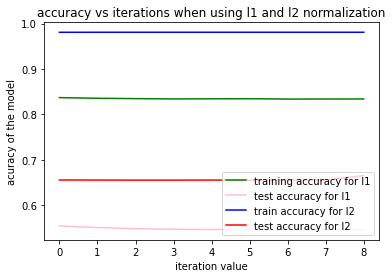

In [30]:
import matplotlib.pyplot as plt
plt.title("accuracy vs iterations when using l1 and l2 normalization")
plt.xlabel("iteration value")
plt.ylabel("acuracy of the model")
plt.plot(Reg_train_l1, color ="green")
plt.plot(Reg_test_l1, color = "pink")
plt.plot(Reg_train_l2, color = "blue")
plt.plot(Reg_test_l2 , color = "red")
plt.legend(["training accuracy for l1", "test accuracy for l1","train accuracy for l2","test accuracy for l2"], loc ="lower right")
plt.show()

In [308]:
per = 1

In [424]:
val_acu, pred_1 , pred_2 = crossval(5,twenty_train_df.data[:int(per*len(twenty_train_df.data))],'reg',twenty_train.target[:int(per*len(twenty_train_df.data))],twenty_test_df.data)

9052
9051
9051
9051
9051


In [276]:
pred_2

0.9808860899348139

In [277]:
 np.concatenate((pred_1[:1],pred_1[1:]))

array([ 7,  1,  2, ..., 15, 12, 15])

In [278]:
print(np.array(val_acu))

[0.9005305  0.89969068 0.9036677  0.91029607 0.90278392]


In [23]:
from sklearn.metrics import accuracy_score

In [280]:
y_true = twenty_test_df.target
a = accuracy_score(np.asarray(pred_1),y_true)

In [281]:
a

0.6552044609665427

**logestic regression**

In [286]:
# Performance LR Classifier 
text_clf = Pipeline([ ('vect', TfidfVectorizer(sublinear_tf=True)), ('clf', LogisticRegression())])  
text_clf.fit(twenty_train_df.data, twenty_train_df.target)
print(text_clf.score(twenty_test_df.data, twenty_test_df.target))

0.6603823685608072


Finding best parameters of LR

In [ ]:
pipeline = Pipeline([('vect', TfidfVectorizer(sublinear_tf=True)), ('clf', LogisticRegression())])  

parameters = {'clf__penalty': ('l1', 'l2')}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(twenty_train_df.data, twenty_train_df.target)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english',
                                                        sublinear_tf=True)),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__penalty': ('l1', 'l2')})

In [ ]:
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.9071


In [ ]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__penalty: 'l2'


In [ ]:
# Test Accuracy
grid_search.best_estimator_.score(twenty_test_df.data, twenty_test_df.target)

0.6702071163037706

# DataSet-2

In [40]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', header=None, 
                 names=["polarity", "id", "date", "flag", "user", "tweet"])
df.head()

,polarity,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [41]:
# Remove Unnecessary columns
tweet_train_df = df.drop(["id","flag","date","user"], axis = 1)
tweet_train_df.head()

,polarity,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [42]:

targets2, frequency2 = np.unique(tweet_train_df.polarity, return_counts=True)
targets2, frequency2 

(array([0, 4], dtype=int64), array([800000, 800000], dtype=int64))

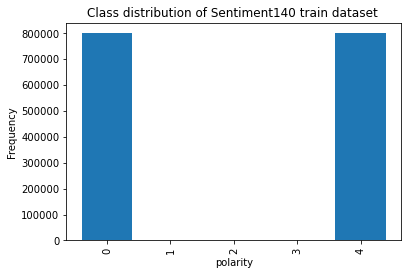

In [43]:

# Training data class distribution
fig=plt.figure( )
plt.bar(targets2,frequency2)
plt.xticks(rotation=90)
plt.title('Class distribution of Sentiment140 train dataset ')
plt.xlabel('polarity')
plt.ylabel('Frequency')
plt.show()

**Data cleaning:**


In [44]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

tweet_train_df['tweet'] = tweet_train_df.tweet.map(alphanumeric).map(punc_lower)
tweet_train_df.head()

,polarity,tweet
0,0,switchfoot http twitpic com awww that ...
1,0,is upset that he can t update his facebook by ...
2,0,kenichan i dived many times for the ball man...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no it s not behaving at all ...


**Test data**

load and cleaning

In [45]:
df2=pd.read_csv('testdata.manual.2009.06.14.csv',encoding='latin', header=None, 
                 names=["polarity", "id", "date", "flag", "user", "tweet"])
df2.head()

,polarity,id,date,flag,user,tweet
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [46]:
# Remove Unnecessary columns
tweet_test_df = df2.drop(["id","flag","date","user"], axis = 1)
tweet_test_df.head()

,polarity,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...


In [47]:

tweet_test_df = tweet_test_df[tweet_test_df.polarity !=2]

In [48]:
tweet_test_df

,polarity,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...
...,...,...
492,4,"After using LaTeX a lot, any other typeset mat..."
494,0,"On that note, I hate Word. I hate Pages. I hat..."
495,4,Ahhh... back in a *real* text editing environm...
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [49]:
targets3, frequency3 = np.unique(tweet_test_df.polarity, return_counts=True)
targets3, frequency3

(array([0, 4], dtype=int64), array([177, 182], dtype=int64))

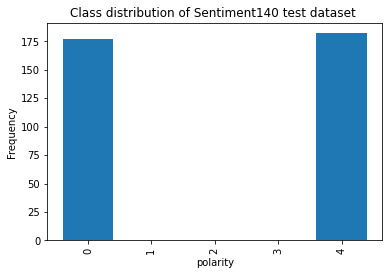

In [50]:
# Training data class distribution
fig=plt.figure( )
plt.bar(targets3,frequency3)
plt.xticks(rotation=90)
plt.title('Class distribution of Sentiment140 test dataset ')
plt.xlabel('polarity')
plt.ylabel('Frequency')
plt.show()

In [51]:
# Text preprocessing steps - remove numbers, captial letters and punctuation

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

tweet_test_df['tweet'] = tweet_test_df.tweet.map(alphanumeric).map(punc_lower)
tweet_test_df.head()

,polarity,tweet
0,4,stellargirl i loooooooovvvvvveee my not th...
1,4,reading my love it lee childs is good...
2,4,ok first assesment of the it fucking ro...
3,4,kenburbary you ll love your i ve had mine ...
4,4,mikefish fair enough but i have the and i...


**Count Vectorizer**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train2_cv = count_vect.fit_transform(tweet_train_df.tweet)  # fit_transform learns the vocab and one-hot encodes
X_test2_cv = count_vect.transform(tweet_test_df.tweet) # transform uses the same vocab and one-hot encodes



**TF-IDF Vectorizer**


In [53]:
# Creating a document-term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer() 

X_train2_tfidfV = tfidfV.fit_transform(tweet_train_df.tweet) # fit_transform learns the vocab and one-hot encodes 
X_test2_tfidfV = tfidfV.transform(tweet_test_df.tweet) # transform uses the same vocab and one-hot encodes 



In [54]:
np.unique(tweet_train_df.polarity)

array([0, 4], dtype=int64)

**logestic regression**

In [55]:
from sklearn.utils import shuffle
data = np.asarray(tweet_train_df.tweet)
label = np.asarray(tweet_train_df.polarity)
x_test = tweet_test_df.tweet
X,Y = shuffle(data,label)
per=0.8

In [ ]:
y_true = tweet_test_df.polarity
a = accuracy_score(np.asarray(pred_1),y_true)

In [ ]:
a 

In [ ]:
per = 10
reg_train = []
reg_test = []
for i in range(10):
    val_acu, pred_1 , pred_2 = crossval(5,X[:int(len(tweet_train_df.polarity))],'KNN',Y[:int(len(tweet_train_df.polarity))],tweet_test_df.tweet,per)
    reg_train.append(pred_2)
    y_true = tweet_test_df.polarity
    a = accuracy_score(np.asarray(pred_1),y_true)
    reg_test.append(a)
    per = per + 10

In [ ]:
print(reg_test)
print(reg_train)


In [373]:
# Performance LR Classifier 
text_clf = Pipeline([ ('vect', TfidfVectorizer(sublinear_tf=True)), ('clf', LogisticRegression())])  
text_clf.fit(tweet_train_df.tweet, tweet_train_df.polarity)
print(text_clf.score(tweet_train_df.tweet, tweet_train_df.polarity))

C:\Users\Prateek Jeet Singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.82357


Finding best parameters of LR

In [ ]:
pipeline = Pipeline([('vect', TfidfVectorizer(sublinear_tf=True)), ('clf', LogisticRegression())])  

parameters = {'clf__penalty': ('l1', 'l2')}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(tweet_train_df.tweet, tweet_train_df.polarity)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(sublinear_tf=True)),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__penalty': ('l1', 'l2')})

In [ ]:
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.7957


In [ ]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__penalty: 'l2'


In [ ]:
# Test Accuracy
grid_search.best_estimator_.score(tweet_test_df.tweet, tweet_test_df.polarity)

0.8189415041782729